In [1]:
from PIL import Image
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
os.environ["PATH"] += os.pathsep + 'C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v9.0/bin'
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [9]:
categories = ["chair", "camera", "butterfly", "elephant", "flamingo"]

In [10]:
nb_classed = len(categories)
Image_w = 64
Image_h = 64
pixels = Image_h * Image_w * 3

In [11]:
X_train, X_test, y_train, y_test = np.load("./image/5obj.npy")

In [12]:
X_train = X_train.astype("float") / 256
X_test =X_test.astype("float") / 256

In [13]:
print(X_test.shape)

(84, 64, 64, 3)


## Model Construction

In [22]:
model = Sequential()
model.add(Convolution2D(32,3,3, border_mode='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,3,3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64,3,3))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classed))
model.add(Activation('softmax'))

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., padding="same")`
  
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  import sys
c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if __name__ == '__main__':


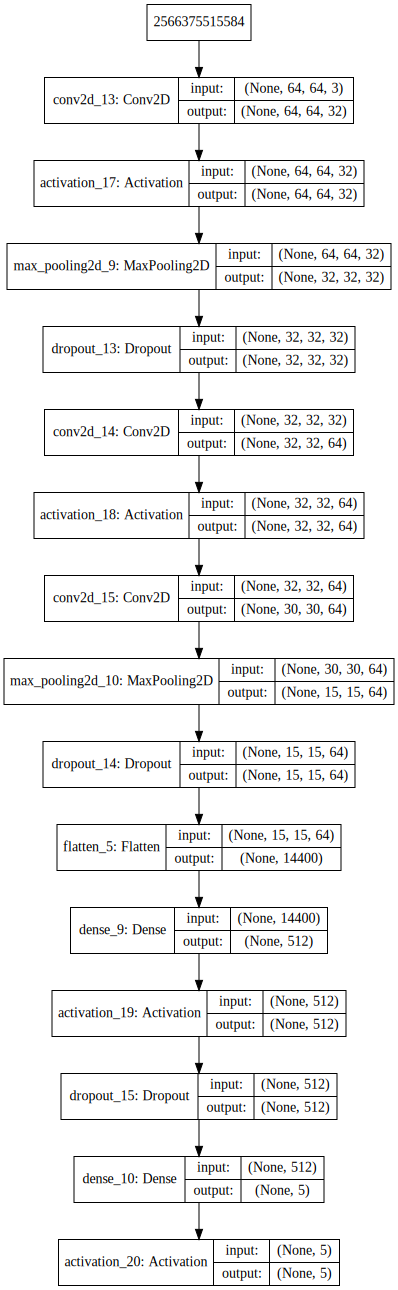

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 [==============================] - 109s 434ms/step - loss: 1.3007 - acc: 0.7200
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4846 - acc: 0.8048
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4803 - acc: 0.8064
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4533 - acc: 0.8072
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4359 - acc: 0.8120
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3787 - acc: 0.8352
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - acc: 0.8192
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3556 - acc: 0.8560
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2584 - acc: 0.8992
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.2016 - acc: 0.9208
Epoch 11/50
250/250 [========================

In [27]:
score = model.evaluate(X_test, y_test)

84/84 [==============================] - 0s 3ms/step


In [28]:
score

[0.7681255851473127, 0.8690476247242519]

In [29]:
print('loss = ' , score[0])
print('Accuracy = ' , score[1])

loss =  0.7681255851473127
Accuracy =  0.8690476247242519


In [30]:
pre = model.predict(X_test)

In [31]:
pre

array([[2.20317656e-06, 3.64982955e-09, 8.72897310e-09, 9.31058453e-10,
        9.99997735e-01],
       [9.19160426e-01, 3.64697389e-02, 3.95541458e-04, 4.38818969e-02,
        9.23840853e-05],
       [7.83700903e-04, 4.01361249e-02, 2.32289707e-07, 9.59079802e-01,
        7.18630204e-08],
       [2.29595462e-04, 2.94162873e-02, 1.28500119e-06, 9.70342815e-01,
        9.95716800e-06],
       [3.10642947e-03, 2.93356277e-11, 4.91713872e-05, 1.29583256e-07,
        9.96844292e-01],
       [4.86845897e-09, 9.99999285e-01, 3.33267810e-12, 7.66100243e-07,
        1.75360296e-13],
       [2.71353632e-01, 2.72542262e-03, 6.70075893e-01, 3.92887014e-04,
        5.54521419e-02],
       [1.19437347e-04, 2.14083098e-08, 1.24116465e-02, 9.55575274e-07,
        9.87467885e-01],
       [2.98496429e-03, 9.97013330e-01, 1.48696836e-06, 7.03087366e-08,
        1.01299964e-08],
       [3.27018566e-19, 4.47740793e-34, 1.00000000e+00, 2.61383154e-19,
        3.07004665e-11],
       [2.03771222e-08, 5.4293

In [33]:
for i,v in enumerate(pre):
    print(i,v)

0 [2.2031766e-06 3.6498295e-09 8.7289731e-09 9.3105845e-10 9.9999774e-01]
1 [9.1916043e-01 3.6469739e-02 3.9554146e-04 4.3881897e-02 9.2384085e-05]
2 [7.8370090e-04 4.0136125e-02 2.3228971e-07 9.5907980e-01 7.1863020e-08]
3 [2.2959546e-04 2.9416287e-02 1.2850012e-06 9.7034281e-01 9.9571680e-06]
4 [3.1064295e-03 2.9335628e-11 4.9171387e-05 1.2958326e-07 9.9684429e-01]
5 [4.8684590e-09 9.9999928e-01 3.3326781e-12 7.6610024e-07 1.7536030e-13]
6 [2.7135363e-01 2.7254226e-03 6.7007589e-01 3.9288701e-04 5.5452142e-02]
7 [1.1943735e-04 2.1408310e-08 1.2411647e-02 9.5557527e-07 9.8746789e-01]
8 [2.9849643e-03 9.9701333e-01 1.4869684e-06 7.0308737e-08 1.0129996e-08]
9 [3.2701857e-19 4.4774079e-34 1.0000000e+00 2.6138315e-19 3.0700466e-11]
10 [2.0377122e-08 5.4293684e-13 7.8624034e-06 9.9999213e-01 2.1199142e-10]
11 [9.9998367e-01 4.6381766e-12 3.8114290e-11 2.0691363e-12 1.6295118e-05]
12 [9.7029066e-01 2.9583247e-02 1.2135602e-05 1.1156542e-04 2.2607635e-06]
13 [9.9723697e-01 2.7500188e-03 6.2

In [37]:
for i,v in enumerate(pre):
    pre_ans = v.argmax()
    ans = y_test[i].argmax()
    dat = X_test[i]
    if ans == pre_ans:
        continue
    print("[NG]", categories[pre_ans], '!=', categories[ans])
    print(v)
    fname = "./image/error/" + str(i) + "-" + categories[pre_ans] + "-ne-" + categories[ans] + ".png"
    dat *= 256
    img = Image.fromarray(np.uint8(dat))
    img.save(fname)

[NG] butterfly != chair
[2.7135363e-01 2.7254226e-03 6.7007589e-01 3.9288701e-04 5.5452142e-02]
[NG] chair != elephant
[9.7029066e-01 2.9583247e-02 1.2135602e-05 1.1156542e-04 2.2607635e-06]
[NG] camera != elephant
[9.8447978e-05 9.5557761e-01 6.3281548e-03 3.7991278e-02 4.5836669e-06]
[NG] butterfly != chair
[7.2777327e-03 2.0685452e-03 9.9065077e-01 2.9313180e-06 8.0411566e-10]
[NG] butterfly != flamingo
[5.7438114e-03 9.7504301e-07 9.9425429e-01 1.9735171e-07 7.0557252e-07]
[NG] butterfly != chair
[8.5314487e-06 6.8150441e-10 9.9999011e-01 9.1024594e-07 3.8098838e-07]
[NG] flamingo != camera
[4.2650450e-02 1.5275440e-02 2.7864805e-01 4.3464734e-09 6.6342604e-01]
[NG] butterfly != flamingo
[6.6934277e-08 2.8503961e-19 9.9997854e-01 7.5067811e-13 2.1301616e-05]
[NG] camera != elephant
[1.6329254e-06 8.8256145e-01 1.9705086e-08 4.6196472e-02 7.1240455e-02]
[NG] chair != elephant
[9.9909639e-01 3.0356258e-09 8.2049542e-04 4.4750068e-05 3.8408620e-05]
[NG] elephant != chair
[1.5063680e-0

In [38]:
hdf5_file = "./image/5obj-model.hdf5"

In [39]:
if os.path.exists(hdf5_file):
    model.load_weights(hdf5_file)
else:
    model.save_weights(hdf5_file)

In [40]:
model_json = model.to_json()

In [41]:
model_json

'{"keras_version": "2.2.0", "class_name": "Sequential", "backend": "tensorflow", "config": [{"class_name": "Conv2D", "config": {"trainable": true, "dtype": "float32", "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_size": [3, 3], "kernel_initializer": {"class_name": "VarianceScaling", "config": {"mode": "fan_avg", "seed": null, "distribution": "uniform", "scale": 1.0}}, "filters": 32, "dilation_rate": [1, 1], "batch_input_shape": [null, 64, 64, 3], "kernel_regularizer": null, "activity_regularizer": null, "strides": [1, 1], "bias_regularizer": null, "padding": "same", "activation": "linear", "bias_constraint": null, "kernel_constraint": null, "name": "conv2d_13", "use_bias": true, "data_format": "channels_last"}}, {"class_name": "Activation", "config": {"name": "activation_17", "trainable": true, "activation": "relu"}}, {"class_name": "MaxPooling2D", "config": {"trainable": true, "strides": [2, 2], "padding": "valid", "name": "max_pooling2d_9", "pool_size": [2, 2], "